,year,population,dp
0,1790.0,3.9,NaN
1,1800.0,5.3,1.4
2,1810.0,7.2,1.9
3,1820.0,9.6,2.4
4,1830.0,12.9,3.3
5,1840.0,17.1,4.2
6,1850.0,23.2,6.1
7,1860.0,31.4,8.2
8,1870.0,38.6,7.2
9,1880.0,50.2,11.6


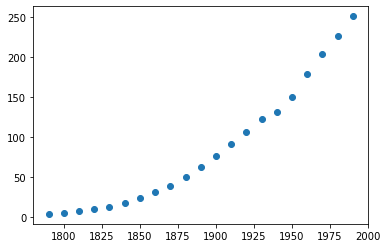

In [18]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit

import pandas as pd
dataset = pd.DataFrame(pd.read_csv('data.csv'),dtype=float)
data = dataset

plt.scatter(dataset.year,dataset.population)
data['dp'] = data.population.diff()
data

In [25]:
dp = data.dp.iloc[1:]
data_size = len(dp)
year = np.arange(data_size)

def loss(pred,real):
    return np.abs(pred-real)/real

def percentage(x):
    return "%.2f%%" % (x * 100)

def fit_display(f):
    popt, _ = curve_fit(f,year,dp/1000)
    print('parameters:',popt)
    pred = f(year,*popt)*1000

    result = data.iloc[1:].copy()
    result['prediction'] = np.round(pred,2)
    loss_ = loss(pred,data.dp)
    result['loss'] = np.asarray(list(map(percentage,loss_)))
    print('loss:',percentage(np.mean(loss_)))

    plt.scatter(year,dp,label='real data')
    plt.plot(year,pred,'r-',label = 'prediction')
    plt.legend()

    return result

In [26]:
def f2(P,r,K):
    return r*(1-P/K)

fit_display(f2)

parameters: [-0.00015429  0.11698282]


ValueError: operands could not be broadcast together with shapes (20,) (21,) 